In [56]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats

import warnings
warnings.filterwarnings('ignore')

In [57]:
pd.set_option('display.max_columns', None)

In [58]:
data = pd.read_csv('Insurance_train (1).csv')
data.head()

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,max_power,engine_type,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,displacement,cylinder,transmission_type,gear_box,steering_type,turning_radius,length,width,height,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,ID00001,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0
1,ID00002,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0
2,ID00003,0.841110,0.02,0.384615,C3,4076,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0
3,ID00004,0.900277,0.11,0.432692,C4,21622,1,C1,M2,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,1.2 L K12N Dualjet,2,Yes,Yes,No,Yes,Yes,Drum,1197,4,Automatic,5,Electric,4.8,3995,1735,1515,1335,Yes,No,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
4,ID00005,0.596403,0.11,0.634615,C5,34738,2,A,M3,Petrol,91Nm@4250rpm,67.06bhp@5500rpm,1.0 SCe,2,No,No,No,No,Yes,Drum,999,3,Automatic,5,Electric,5.0,3731,1579,1490,1155,No,No,No,No,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0


In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58592 entries, 0 to 58591
Data columns (total 44 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_id                         58592 non-null  object 
 1   policy_tenure                     58592 non-null  float64
 2   age_of_car                        58592 non-null  float64
 3   age_of_policyholder               58592 non-null  float64
 4   area_cluster                      58592 non-null  object 
 5   population_density                58592 non-null  int64  
 6   make                              58592 non-null  int64  
 7   segment                           58592 non-null  object 
 8   model                             58592 non-null  object 
 9   fuel_type                         58592 non-null  object 
 10  max_torque                        58592 non-null  object 
 11  max_power                         58592 non-null  object 
 12  engi

In [60]:
data.select_dtypes(include = np.number).columns

Index(['policy_tenure', 'age_of_car', 'age_of_policyholder',
       'population_density', 'make', 'airbags', 'displacement', 'cylinder',
       'gear_box', 'turning_radius', 'length', 'width', 'height',
       'gross_weight', 'ncap_rating', 'is_claim'],
      dtype='object')

In [61]:
data_num = ['policy_tenure', 'age_of_car', 'age_of_policyholder',
       'population_density', 'displacement', 'turning_radius', 'length', 'width', 'height',
       'gross_weight']

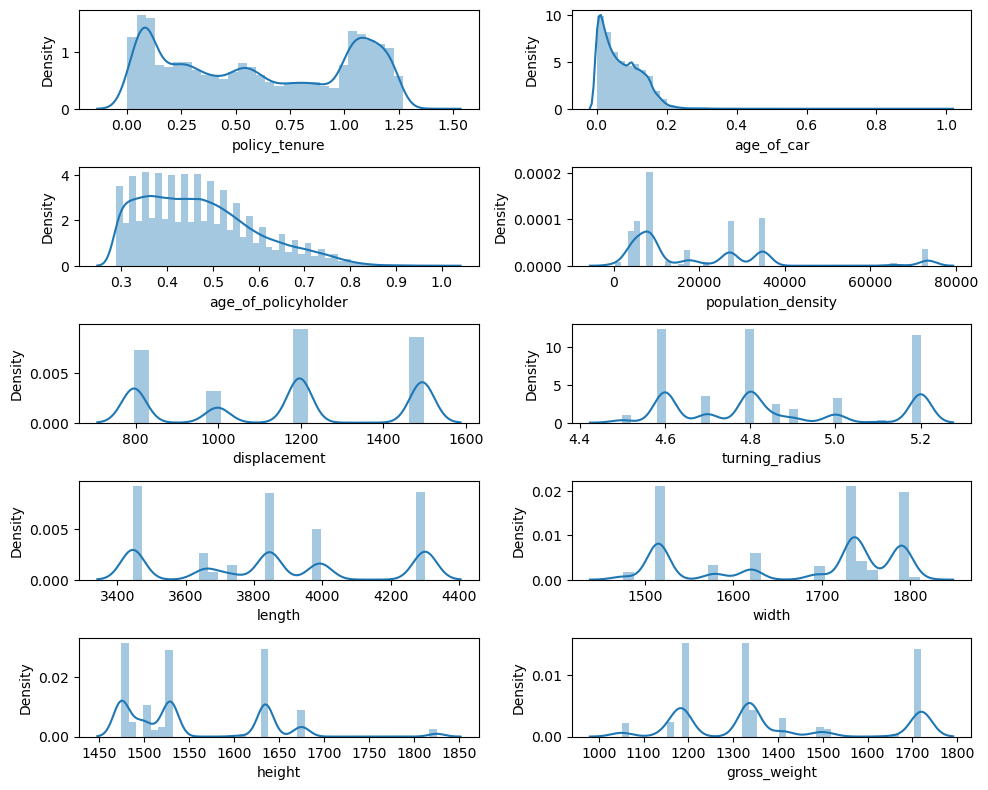

In [62]:
nrows = 5
ncols = 2
repeater = 1

plt.figure(figsize=(10,8))

for i in data_num:
    plt.subplot(nrows, ncols, repeater)
    sns.distplot(data[i])
    repeater+=1
    
plt.tight_layout()
plt.show()

In [63]:
data.select_dtypes(include='object').columns

Index(['policy_id', 'area_cluster', 'segment', 'model', 'fuel_type',
       'max_torque', 'max_power', 'engine_type', 'is_esc',
       'is_adjustable_steering', 'is_tpms', 'is_parking_sensors',
       'is_parking_camera', 'rear_brakes_type', 'transmission_type',
       'steering_type', 'is_front_fog_lights', 'is_rear_window_wiper',
       'is_rear_window_washer', 'is_rear_window_defogger', 'is_brake_assist',
       'is_power_door_locks', 'is_central_locking', 'is_power_steering',
       'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror',
       'is_ecw', 'is_speed_alert'],
      dtype='object')

In [64]:
data_cat = ['area_cluster', 'segment', 'model', 'fuel_type', 'engine_type', 'is_esc',
       'is_adjustable_steering', 'is_tpms', 'is_parking_sensors',
       'is_parking_camera', 'rear_brakes_type', 'transmission_type',
       'steering_type', 'is_front_fog_lights', 'is_rear_window_wiper',
       'is_rear_window_washer', 'is_rear_window_defogger', 'is_brake_assist',
       'is_power_door_locks', 'is_central_locking', 'is_power_steering',
       'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror',
       'is_ecw', 'is_speed_alert', 'make', 'airbags', 'cylinder', 'ncap_rating', 'is_claim', 'gear_box']
len(data_cat)

31

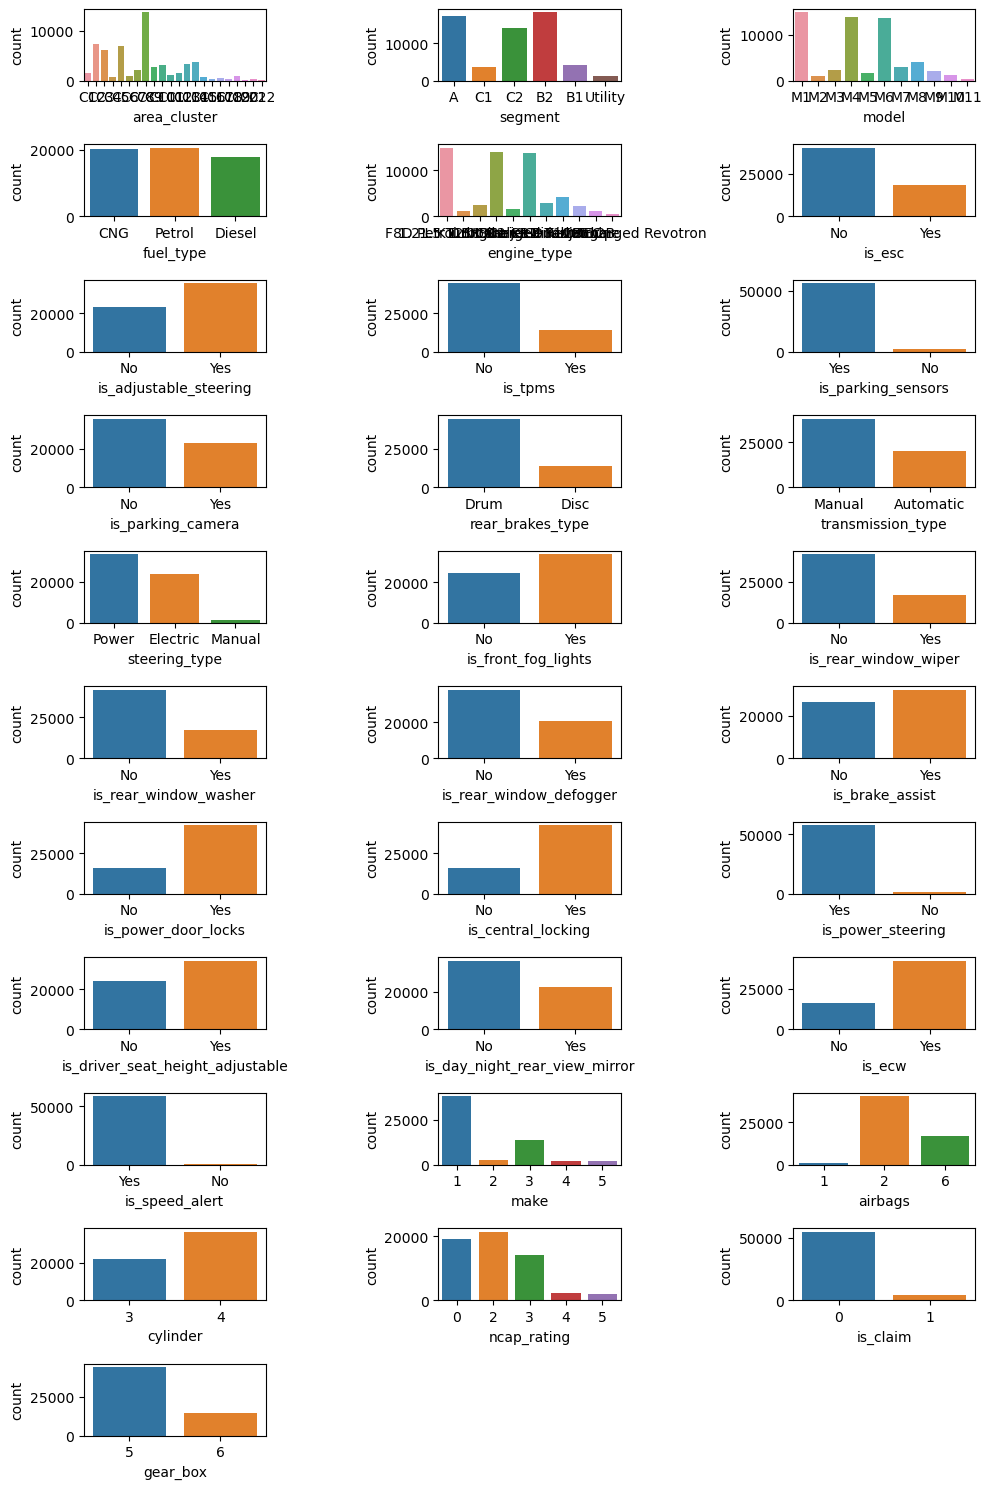

In [65]:
nrows = 11
ncols = 3
repeater = 1

plt.figure(figsize=(10,15))

for i in data_cat:
    plt.subplot(nrows, ncols, repeater)
    sns.countplot(x=data[i])
    repeater+=1
    
plt.tight_layout()
plt.show()

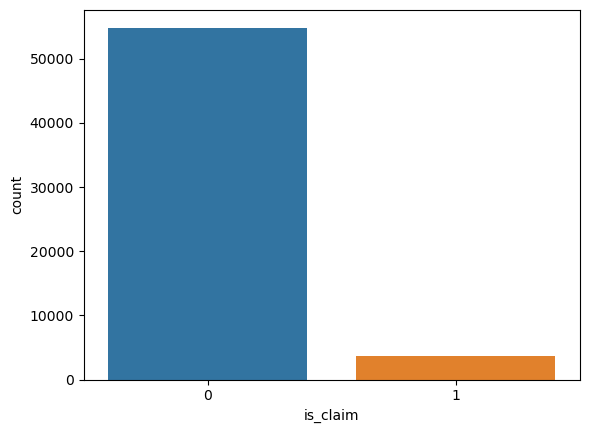

In [66]:
sns.countplot(x=data['is_claim']);

In [67]:
data['is_claim'].value_counts(normalize=True)

0    0.936032
1    0.063968
Name: is_claim, dtype: float64

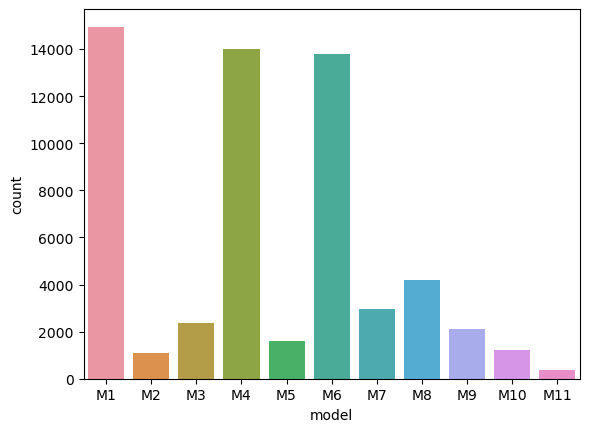

In [68]:
sns.countplot(x=data['model']);

In [69]:
# M1, M4, and M6 are top 3 Models

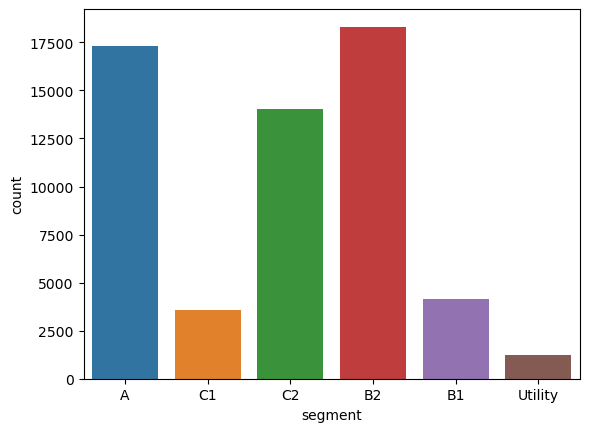

In [70]:
sns.countplot(x=data['segment']);

In [71]:
# B, A and C2 are top 3 Segments

<Axes: >

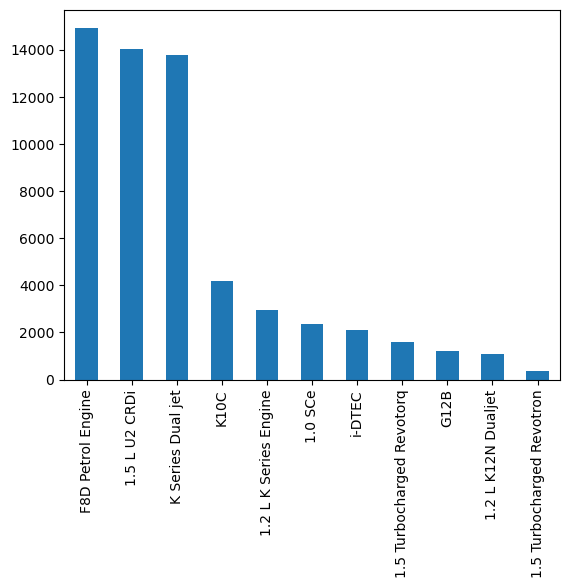

In [72]:
data['engine_type'].value_counts().plot(kind='bar')

In [73]:
# Top 3 : ^

<Axes: >

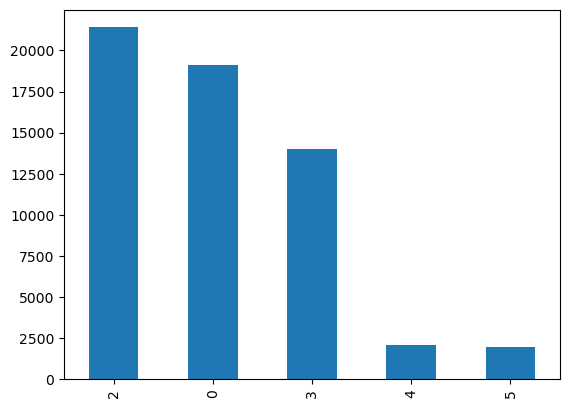

In [74]:
# Engine
data['ncap_rating'].value_counts().plot(kind='bar')

In [75]:
pd.crosstab(data['ncap_rating'], data['is_claim'], normalize=True)

is_claim,0,1
ncap_rating,,
0,0.305588,0.020344
2,0.341531,0.023740
3,0.223870,0.015378
4,0.033810,0.002270
5,0.031233,0.002236


### Feature Engineering

In [76]:
data.head(1)

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,max_power,engine_type,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,displacement,cylinder,transmission_type,gear_box,steering_type,turning_radius,length,width,height,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,ID00001,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0


In [77]:
data['Nm'] = data['max_torque'].apply(lambda x: x.split('Nm')[0])

In [78]:
data['Nm'] = data['Nm'].astype(float)

In [79]:
data['rpm']= data['max_torque'].apply(lambda x: x.split('@')[1]).apply(lambda x: x.split('rpm')[0])
data['rpm'] = data['rpm'].astype(int)
data['rpm']

0        3500
1        3500
2        3500
3        4400
4        4250
         ... 
58587    4250
58588    3500
58589    3500
58590    4400
58591    2750
Name: rpm, Length: 58592, dtype: int32

In [80]:
data['bhp'] = data['max_power'].apply(lambda x: x.split('bhp')[0])
data['bhp'] = data['bhp'].astype(float)
data['bhp']

0         40.36
1         40.36
2         40.36
3         88.50
4         67.06
          ...  
58587     67.06
58588     40.36
58589     40.36
58590     88.50
58591    113.45
Name: bhp, Length: 58592, dtype: float64

In [81]:
data['rpm_power']= data['max_power'].apply(lambda x: x.split('@')[1]).apply(lambda x: x.split('rpm')[0])
data['rpm_power'] = data['rpm_power'].astype(int)
data['rpm_power']

0        6000
1        6000
2        6000
3        6000
4        5500
         ... 
58587    5500
58588    6000
58589    6000
58590    6000
58591    4000
Name: rpm_power, Length: 58592, dtype: int32

In [82]:
# Converting is_ columns to 1 or 0

In [83]:
data.select_dtypes(include='object').columns

Index(['policy_id', 'area_cluster', 'segment', 'model', 'fuel_type',
       'max_torque', 'max_power', 'engine_type', 'is_esc',
       'is_adjustable_steering', 'is_tpms', 'is_parking_sensors',
       'is_parking_camera', 'rear_brakes_type', 'transmission_type',
       'steering_type', 'is_front_fog_lights', 'is_rear_window_wiper',
       'is_rear_window_washer', 'is_rear_window_defogger', 'is_brake_assist',
       'is_power_door_locks', 'is_central_locking', 'is_power_steering',
       'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror',
       'is_ecw', 'is_speed_alert'],
      dtype='object')

In [84]:
is_cols = ['is_esc',
       'is_adjustable_steering', 'is_tpms', 'is_parking_sensors',
       'is_parking_camera', 'is_front_fog_lights', 'is_rear_window_wiper',
       'is_rear_window_washer', 'is_rear_window_defogger', 'is_brake_assist',
       'is_power_door_locks', 'is_central_locking', 'is_power_steering',
       'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror',
       'is_ecw', 'is_speed_alert']

labels = {'Yes': 1, 'No': 0}

for i in is_cols:
    data[i] = data[i].map(labels)

In [85]:
data

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,max_power,engine_type,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,displacement,cylinder,transmission_type,gear_box,steering_type,turning_radius,length,width,height,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim,Nm,rpm,bhp,rpm_power
0,ID00001,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,0,0,0,1,0,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,0,0,0,0,0,0,0,1,0,0,0,1,0,0,60.0,3500,40.36,6000
1,ID00002,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,0,0,0,1,0,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,0,0,0,0,0,0,0,1,0,0,0,1,0,0,60.0,3500,40.36,6000
2,ID00003,0.841110,0.02,0.384615,C3,4076,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,0,0,0,1,0,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,0,0,0,0,0,0,0,1,0,0,0,1,0,0,60.0,3500,40.36,6000
3,ID00004,0.900277,0.11,0.432692,C4,21622,1,C1,M2,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,1.2 L K12N Dualjet,2,1,1,0,1,1,Drum,1197,4,Automatic,5,Electric,4.8,3995,1735,1515,1335,1,0,0,1,1,1,1,1,1,1,1,1,2,0,113.0,4400,88.50,6000
4,ID00005,0.596403,0.11,0.634615,C5,34738,2,A,M3,Petrol,91Nm@4250rpm,67.06bhp@5500rpm,1.0 SCe,2,0,0,0,0,1,Drum,999,3,Automatic,5,Electric,5.0,3731,1579,1490,1155,0,0,0,0,0,1,1,1,0,1,1,1,2,0,91.0,4250,67.06,5500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58587,ID58588,0.355089,0.13,0.644231,C8,8794,2,A,M3,Petrol,91Nm@4250rpm,67.06bhp@5500rpm,1.0 SCe,2,0,0,0,0,1,Drum,999,3,Automatic,5,Electric,5.0,3731,1579,1490,1155,0,0,0,0,0,1,1,1,0,1,1,1,2,0,91.0,4250,67.06,5500
58588,ID58589,1.199642,0.02,0.519231,C14,7788,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,0,0,0,1,0,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,0,0,0,0,0,0,0,1,0,0,0,1,0,0,60.0,3500,40.36,6000
58589,ID58590,1.162273,0.05,0.451923,C5,34738,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,0,0,0,1,0,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,0,0,0,0,0,0,0,1,0,0,0,1,0,0,60.0,3500,40.36,6000
58590,ID58591,1.236307,0.14,0.557692,C8,8794,1,B2,M6,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,K Series Dual jet,2,0,1,0,1,0,Drum,1197,4,Manual,5,Electric,4.8,3845,1735,1530,1335,1,0,0,0,1,1,1,1,1,1,1,1,2,0,113.0,4400,88.50,6000


In [86]:
# Dropping some variables

In [87]:
data.drop(['policy_id', 'max_torque', 'max_power'], axis=1, inplace=True)

In [88]:
data.head()

,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,engine_type,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,displacement,cylinder,transmission_type,gear_box,steering_type,turning_radius,length,width,height,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim,Nm,rpm,bhp,rpm_power
0,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,F8D Petrol Engine,2,0,0,0,1,0,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,0,0,0,0,0,0,0,1,0,0,0,1,0,0,60.0,3500,40.36,6000
1,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,F8D Petrol Engine,2,0,0,0,1,0,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,0,0,0,0,0,0,0,1,0,0,0,1,0,0,60.0,3500,40.36,6000
2,0.841110,0.02,0.384615,C3,4076,1,A,M1,CNG,F8D Petrol Engine,2,0,0,0,1,0,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,0,0,0,0,0,0,0,1,0,0,0,1,0,0,60.0,3500,40.36,6000
3,0.900277,0.11,0.432692,C4,21622,1,C1,M2,Petrol,1.2 L K12N Dualjet,2,1,1,0,1,1,Drum,1197,4,Automatic,5,Electric,4.8,3995,1735,1515,1335,1,0,0,1,1,1,1,1,1,1,1,1,2,0,113.0,4400,88.50,6000
4,0.596403,0.11,0.634615,C5,34738,2,A,M3,Petrol,1.0 SCe,2,0,0,0,0,1,Drum,999,3,Automatic,5,Electric,5.0,3731,1579,1490,1155,0,0,0,0,0,1,1,1,0,1,1,1,2,0,91.0,4250,67.06,5500


In [89]:
data['engine_type'].unique()

array(['F8D Petrol Engine', '1.2 L K12N Dualjet', '1.0 SCe',
       '1.5 L U2 CRDi', '1.5 Turbocharged Revotorq', 'K Series Dual jet',
       '1.2 L K Series Engine', 'K10C', 'i-DTEC', 'G12B',
       '1.5 Turbocharged Revotron'], dtype=object)

In [90]:
def power(x):
    if x <= 1000:
        return 'Small_engine'
    elif x <=1200:
        return 'Med_engine'
    else:
        return 'High_power_engine'

data['dis_bin'] = data['displacement'].apply(power)

In [91]:
data.drop('engine_type', axis=1, inplace=True)

In [92]:
data['area_cluster'].value_counts().head(3)

C8    13654
C2     7342
C5     6979
Name: area_cluster, dtype: int64

In [93]:
data['area_cluster'].unique()

array(['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11',
       'C12', 'C13', 'C14', 'C15', 'C16', 'C17', 'C18', 'C19', 'C20',
       'C21', 'C22'], dtype=object)

In [94]:
area = ['C1', 'C3', 'C4', 'C6', 'C7', 'C9', 'C10', 'C11',
       'C12', 'C13', 'C14', 'C15', 'C16', 'C17', 'C18', 'C19', 'C20',
       'C21', 'C22']

def areas(x):
    if x in area:
        return 'Others'
    else:
        return x
    
data['area_cluster'] = data['area_cluster'].apply(areas)
data['area_cluster']

0        Others
1            C2
2        Others
3        Others
4            C5
          ...  
58587        C8
58588    Others
58589        C5
58590        C8
58591        C8
Name: area_cluster, Length: 58592, dtype: object

In [95]:
data['segment'].unique()

array(['A', 'C1', 'C2', 'B2', 'B1', 'Utility'], dtype=object)

In [96]:
data['model'].unique()

array(['M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9', 'M10', 'M11'],
      dtype=object)

In [97]:
model = ['M2', 'M3', 'M5', 'M7', 'M8', 'M9', 'M10', 'M11']

def models(x):
    if x in model:
        return 'Others'
    else:
        return x
    
data['model'] = data['model'].apply(models)
data['model']

0            M1
1            M1
2            M1
3        Others
4        Others
          ...  
58587    Others
58588        M1
58589        M1
58590        M6
58591        M4
Name: model, Length: 58592, dtype: object

In [98]:
data.head()

,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,displacement,cylinder,transmission_type,gear_box,steering_type,turning_radius,length,width,height,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim,Nm,rpm,bhp,rpm_power,dis_bin
0,0.515874,0.05,0.644231,Others,4990,1,A,M1,CNG,2,0,0,0,1,0,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,0,0,0,0,0,0,0,1,0,0,0,1,0,0,60.0,3500,40.36,6000,Small_engine
1,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,2,0,0,0,1,0,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,0,0,0,0,0,0,0,1,0,0,0,1,0,0,60.0,3500,40.36,6000,Small_engine
2,0.841110,0.02,0.384615,Others,4076,1,A,M1,CNG,2,0,0,0,1,0,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,0,0,0,0,0,0,0,1,0,0,0,1,0,0,60.0,3500,40.36,6000,Small_engine
3,0.900277,0.11,0.432692,Others,21622,1,C1,Others,Petrol,2,1,1,0,1,1,Drum,1197,4,Automatic,5,Electric,4.8,3995,1735,1515,1335,1,0,0,1,1,1,1,1,1,1,1,1,2,0,113.0,4400,88.50,6000,Med_engine
4,0.596403,0.11,0.634615,C5,34738,2,A,Others,Petrol,2,0,0,0,0,1,Drum,999,3,Automatic,5,Electric,5.0,3731,1579,1490,1155,0,0,0,0,0,1,1,1,0,1,1,1,2,0,91.0,4250,67.06,5500,Small_engine


In [99]:
data['segment'].unique()

array(['A', 'C1', 'C2', 'B2', 'B1', 'Utility'], dtype=object)

In [100]:
data['segment'].value_counts().head(3)

B2    18314
A     17321
C2    14018
Name: segment, dtype: int64

In [101]:
seg = ['C1', 'B1', 'Utility']

def segments(x):
    if x in seg:
        return 'Others'
    else:
        return x
    
data['segment'] = data['segment'].apply(segments)
data['segment']

0             A
1             A
2             A
3        Others
4             A
          ...  
58587         A
58588         A
58589         A
58590        B2
58591        C2
Name: segment, Length: 58592, dtype: object

In [102]:
data_dummy = pd.get_dummies(data, drop_first=True)
data_dummy

,policy_tenure,age_of_car,age_of_policyholder,population_density,make,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,displacement,cylinder,gear_box,turning_radius,length,width,height,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim,Nm,rpm,bhp,rpm_power,area_cluster_C5,area_cluster_C8,area_cluster_Others,segment_B2,segment_C2,segment_Others,model_M4,model_M6,model_Others,fuel_type_Diesel,fuel_type_Petrol,rear_brakes_type_Drum,transmission_type_Manual,steering_type_Manual,steering_type_Power,dis_bin_Med_engine,dis_bin_Small_engine
0,0.515874,0.05,0.644231,4990,1,2,0,0,0,1,0,796,3,5,4.6,3445,1515,1475,1185,0,0,0,0,0,0,0,1,0,0,0,1,0,0,60.0,3500,40.36,6000,0,0,1,0,0,0,0,0,0,0,0,1,1,0,1,0,1
1,0.672619,0.02,0.375000,27003,1,2,0,0,0,1,0,796,3,5,4.6,3445,1515,1475,1185,0,0,0,0,0,0,0,1,0,0,0,1,0,0,60.0,3500,40.36,6000,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,1
2,0.841110,0.02,0.384615,4076,1,2,0,0,0,1,0,796,3,5,4.6,3445,1515,1475,1185,0,0,0,0,0,0,0,1,0,0,0,1,0,0,60.0,3500,40.36,6000,0,0,1,0,0,0,0,0,0,0,0,1,1,0,1,0,1
3,0.900277,0.11,0.432692,21622,1,2,1,1,0,1,1,1197,4,5,4.8,3995,1735,1515,1335,1,0,0,1,1,1,1,1,1,1,1,1,2,0,113.0,4400,88.50,6000,0,0,1,0,0,1,0,0,1,0,1,1,0,0,0,1,0
4,0.596403,0.11,0.634615,34738,2,2,0,0,0,0,1,999,3,5,5.0,3731,1579,1490,1155,0,0,0,0,0,1,1,1,0,1,1,1,2,0,91.0,4250,67.06,5500,1,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58587,0.355089,0.13,0.644231,8794,2,2,0,0,0,0,1,999,3,5,5.0,3731,1579,1490,1155,0,0,0,0,0,1,1,1,0,1,1,1,2,0,91.0,4250,67.06,5500,0,1,0,0,0,0,0,0,1,0,1,1,0,0,0,0,1
58588,1.199642,0.02,0.519231,7788,1,2,0,0,0,1,0,796,3,5,4.6,3445,1515,1475,1185,0,0,0,0,0,0,0,1,0,0,0,1,0,0,60.0,3500,40.36,6000,0,0,1,0,0,0,0,0,0,0,0,1,1,0,1,0,1
58589,1.162273,0.05,0.451923,34738,1,2,0,0,0,1,0,796,3,5,4.6,3445,1515,1475,1185,0,0,0,0,0,0,0,1,0,0,0,1,0,0,60.0,3500,40.36,6000,1,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,1
58590,1.236307,0.14,0.557692,8794,1,2,0,1,0,1,0,1197,4,5,4.8,3845,1735,1530,1335,1,0,0,0,1,1,1,1,1,1,1,1,2,0,113.0,4400,88.50,6000,0,1,0,1,0,0,0,1,0,0,1,1,1,0,0,1,0


### Train Test Spit

In [103]:
from sklearn.model_selection import train_test_split

In [104]:
X = data_dummy.drop('is_claim', axis=1)
y = data_dummy['is_claim']

In [105]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [106]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((46873, 53), (11719, 53), (46873,), (11719,))

### Model

In [107]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

In [108]:
logreg = LogisticRegression()
gnb = GaussianNB()

# Fit on train and test for logreg
pred_train_lg = logreg.fit(X_train, y_train).predict(X_train)
pred_test_lg = logreg.fit(X_train, y_train).predict(X_test)

# Fit on train and test for GausianNB
pred_train_gnb = gnb.fit(X_train, y_train).predict(X_train)
pred_test_gnb = gnb.fit(X_train, y_train).predict(X_test)

### Validation Metrics

In [109]:
from sklearn.metrics import accuracy_score, classification_report

In [110]:
print('Logreg Train Acc: ', accuracy_score(y_train, pred_train_lg))
print('Logreg Test Acc: ', accuracy_score(y_test, pred_test_lg))

print('GNB Train Acc: ', accuracy_score(y_train, pred_train_gnb))
print('GNB Test Acc: ', accuracy_score(y_test, pred_test_gnb))

Logreg Train Acc:  0.9351225652294498
Logreg Test Acc:  0.939670620360099
GNB Train Acc:  0.9351225652294498
GNB Test Acc:  0.939670620360099


## Precision and Recall-

* Precision is the ratio of correctly predicted positive class to the total positives. It is defined as (TP/TP+FP).

* Recall has two names Sensitivity and True Positive Rate. It is the ratio of correctly predicted **positive observations to all the observations**. (TP/TP+FN).

Note: Precision and recall are inversely associated with eath other. It means that if the precision increases, the recall will go down and vice-versa.

* High recall indicates that you have very low false negatives.

* High precision indicates that you have very low false positives.

#### I need to balance of Precision and recall- Harmonic mean of P & R

* The harmonic mean of precision and recall is called F1 score.
* While seeking balance between precision and recall, we can use a metric known as F1-score.

In [112]:
# Classfication report- Precision, Recall and F1 score

print(classification_report(y_test,pred_test_lg))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97     11012
           1       0.00      0.00      0.00       707

    accuracy                           0.94     11719
   macro avg       0.47      0.50      0.48     11719
weighted avg       0.88      0.94      0.91     11719



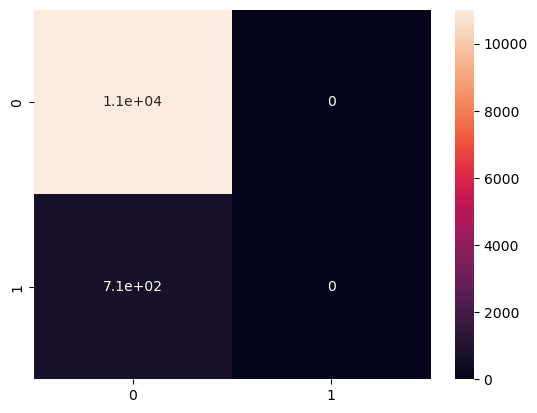

In [118]:
from sklearn.metrics import confusion_matrix, f1_score

sns.heatmap(confusion_matrix(y_test,pred_test_lg),annot=True)
plt.show()

In [119]:
print("f1-score- ",f1_score(y_test,pred_test_lg))

#predicting for class 1

f1-score-  0.0


### SMOTE- Handling Imbalanced Dataset-

* Synthetic minority oversampling technique- This is an oversampling strategy. It means we will try to synthetically generate more data for the minority class.

* This way the imbalanced will be reduced upto certain extent and thus the model will be able to capture the precision and recall of minority class.

* Such models are generalised models as they are able to control the overfitting where in only majority class gets weightage and model predicts only that class.

In [120]:
from imblearn.over_sampling import SMOTE

In [122]:
smote=SMOTE(sampling_strategy="minority",random_state=0)

In [123]:
# Recreate new samples-
X_resampled,y_resampled=smote.fit_resample(X,y)

In [124]:
print("Y: ",y.value_counts())
print("Y_SMOTE: ",y_resampled.value_counts())

Y:  0    54844
1     3748
Name: is_claim, dtype: int64
Y_SMOTE:  0    54844
1    54844
Name: is_claim, dtype: int64


In [125]:
xtrain,xtest,ytrain,ytest=train_test_split(X_resampled,y_resampled, test_size=0.20,random_state=42)

In [126]:
lg=LogisticRegression()
pred=lg.fit(xtrain,ytrain).predict(xtest)

print(classification_report(ytest,pred))

              precision    recall  f1-score   support

           0       0.53      0.40      0.45     11092
           1       0.51      0.64      0.56     10846

    accuracy                           0.51     21938
   macro avg       0.52      0.52      0.51     21938
weighted avg       0.52      0.51      0.51     21938



In [128]:
from sklearn.ensemble import GradientBoostingClassifier

gbm=GradientBoostingClassifier()
pred=gbm.fit(xtrain,ytrain).predict(xtest)

print(classification_report(ytest,pred))

              precision    recall  f1-score   support

           0       0.87      0.95      0.91     11092
           1       0.94      0.86      0.90     10846

    accuracy                           0.90     21938
   macro avg       0.91      0.90      0.90     21938
weighted avg       0.91      0.90      0.90     21938



In [129]:
## Decision Tree-

In [133]:
from sklearn.tree import DecisionTreeClassifier

dtree= DecisionTreeClassifier(random_state=123)

pred= dtree.fit(xtrain,ytrain).predict(xtest)

from sklearn.metrics import classification_report

print(classification_report(ytest,pred))

              precision    recall  f1-score   support

           0       0.93      0.91      0.92     11092
           1       0.91      0.93      0.92     10846

    accuracy                           0.92     21938
   macro avg       0.92      0.92      0.92     21938
weighted avg       0.92      0.92      0.92     21938



In [ ]:
# Plot the Decision Tree

from sklearn.tree import plot_tree

output=plot_tree (dtree,feature_names=X.columns,filled=True,fontsize=12)

# Pruning-

In [134]:
# List of parameters-

params=[{"max_depth":[3,5,7,9,11,14,15,20],"max_features":[None,"sqrt","auto"],"min_samples_split":[5000,10000,12000,15000]}]

In [137]:
from sklearn.model_selection import RandomizedSearchCV

tree= DecisionTreeClassifier(random_state=123)

search= RandomizedSearchCV(estimator=tree,
                          param_distributions=params,
                          cv=5,
                          random_state=123,
                          scoring="recall")

In [141]:
search.fit(X_resampled,y_resampled)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=123),
                   param_distributions=[{'max_depth': [3, 5, 7, 9, 11, 14, 15,
                                                       20],
                                         'max_features': [None, 'sqrt', 'auto'],
                                         'min_samples_split': [5000, 10000,
                                                               12000, 15000]}],
                   random_state=123, scoring='recall')

In [142]:
search.best_params_

{'min_samples_split': 5000, 'max_features': None, 'max_depth': 14}

In [143]:
dtree= DecisionTreeClassifier(min_samples_split=5000,max_depth=14,random_state=123)
pred= dtree.fit(xtrain,ytrain).predict(xtest)

from sklearn.metrics import classification_report

print(classification_report(ytest,pred))

              precision    recall  f1-score   support

           0       0.79      0.72      0.75     11092
           1       0.74      0.80      0.77     10846

    accuracy                           0.76     21938
   macro avg       0.76      0.76      0.76     21938
weighted avg       0.76      0.76      0.76     21938



In [145]:
from sklearn.metrics import cohen_kappa_score

cohen_kappa_score(ytest,pred)

# Kappa Score is 52% which means model is a good model....

0.5246762142376129

In [147]:
# Naive Bayes

from sklearn.naive_bayes import GaussianNB

gnb=GaussianNB()

pred=gnb.fit(xtrain,ytrain).predict(xtest)

print(classification_report(ytest,pred))

              precision    recall  f1-score   support

           0       0.56      0.52      0.54     11092
           1       0.54      0.58      0.56     10846

    accuracy                           0.55     21938
   macro avg       0.55      0.55      0.55     21938
weighted avg       0.55      0.55      0.55     21938



## KNN-

In [151]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

range_k= range(1,25)
k_scores=[]

for i in range_k:
    knn=KNeighborsClassifier(n_neighbors=i)
    scores= cross_val_score(knn,xtrain,ytrain,scoring="recall",cv=10)
    k_scores.append(scores)

In [152]:
k_scores

[array([0.9175    , 0.90386364, 0.90318182, 0.91      , 0.90636364,
        0.90409091, 0.90340909, 0.90068182, 0.89861332, 0.90543305]),
 array([0.81386364, 0.80159091, 0.80727273, 0.80136364, 0.79159091,
        0.8       , 0.81136364, 0.79931818, 0.80313708, 0.8024551 ]),
 array([0.91909091, 0.91068182, 0.91795455, 0.91454545, 0.91931818,
        0.90954545, 0.9175    , 0.91159091, 0.91725392, 0.91475335]),
 array([0.87431818, 0.86068182, 0.86931818, 0.8575    , 0.85681818,
        0.85636364, 0.86613636, 0.85431818, 0.87087975, 0.86406001]),
 array([0.92840909, 0.91568182, 0.92681818, 0.91659091, 0.91954545,
        0.91090909, 0.92181818, 0.91431818, 0.92521028, 0.91975449]),
 array([0.89068182, 0.87727273, 0.88590909, 0.87431818, 0.87727273,
        0.87431818, 0.88159091, 0.875     , 0.88497386, 0.88065469]),
 array([0.92454545, 0.91295455, 0.92295455, 0.91545455, 0.91863636,
        0.91545455, 0.91977273, 0.91272727, 0.92521028, 0.92066379]),
 array([0.88840909, 0.885     , 0.

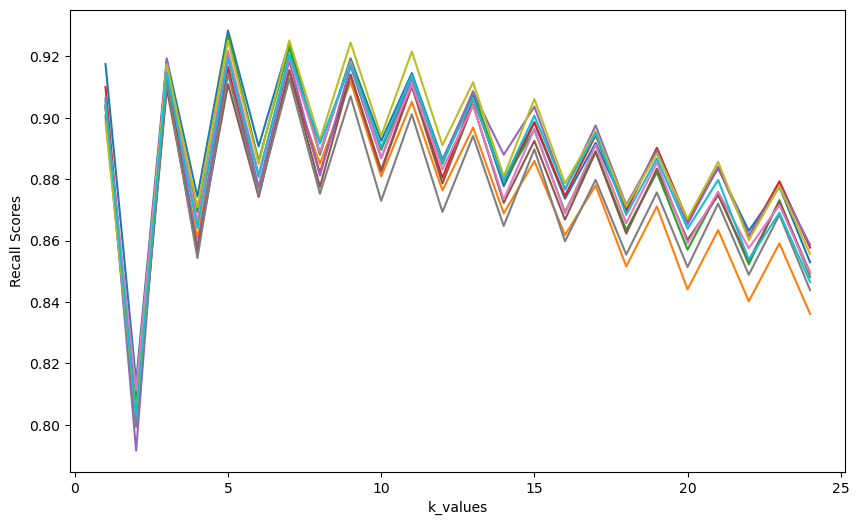

In [158]:
plt.figure(figsize=(10,6))
plt.plot(range_k,k_scores)
plt.xlabel("k_values")
plt.ylabel("Recall Scores")
plt.show()

In [160]:
for i in range(0,24):
    print(i,k_scores[i].mean())
    

0 0.9053137283266859
1 0.8031955816404555
2 0.9152234547107815
3 0.863039430449069
4 0.9199055673810163
5 0.8801992188307259
6 0.9188374062286883
7 0.885017824298911
8 0.9162464093079004
9 0.8859723749199198
10 0.9114280776622786
11 0.8821767395482445
12 0.9048140434809564
13 0.8764263727293393
14 0.8968137903242471
15 0.8706762590671433
16 0.8901088780507965
17 0.8649258974147017
18 0.884267617640373
19 0.8600847919981813
20 0.8778810318460808
21 0.8552435005889768
22 0.8726533354688047
23 0.8498568682965137


In [159]:
# Now we can use this to build the model-

k=KNeighborsClassifier(n_neighbors=5)

pred=k.fit(xtrain,ytrain).predict(xtest)

print(classification_report(ytest,pred))

              precision    recall  f1-score   support

           0       0.90      0.71      0.79     11092
           1       0.75      0.92      0.83     10846

    accuracy                           0.81     21938
   macro avg       0.83      0.81      0.81     21938
weighted avg       0.83      0.81      0.81     21938

